# Midas Tweets scrapped from their handle@twitter-->@midasIIITD


here i have used my OAuth keys from twitter to interact with the api using tweepy module

In [3]:

import tweepy
import csv
import pandas as pd
#credentials here
consumer_key = 'V0E9ClWo9piWta3mmciu7zuBE'
consumer_secret = 'aupdS7q7h5Wwce3TiLuTPjMGzZZCqP6aQZBMfOIitmVo1ZLnmV'
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
#####setting the api object using authentication tokens


tweet=[];
tw
obj_tweet=[]

#two methods for iterating over user tweets

# for tw in tweepy.Cursor(api.search,q="midasIIITD", lang="en").items():
#     tweet.append(tw.text)
#     obj_tweet.append(tw)
    
for tw in api.user_timeline(screen_name="midasIIITD"):
    tweet.append(tw.text)
    obj_tweet.append(tw)    
    
#here wecan give count parameter to specify the number of tweets to be extracted

# with open('data.txt', 'w') as outfile:  
#     json.dump(data, outfile)

Data cleaning of text from tweets.Data obtained from web usually contains a lot of html entities like &lt; &gt; &amp; which gets embedded in the original data. It is thus necessary to get rid of these entities.

In [4]:
from html.parser import HTMLParser
html_parser =HTMLParser()
taco = html_parser.unescape(tweet)
tweet=taco


C:\Users\Jayant\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


dumping the tweets in pandas dataframe

In [5]:
frame = pd.DataFrame(data=[t for t in tweet], columns=['Tweets'])
frame.head()

,Tweets
0,"Congratulations @midasIIITD team, Rohan, Prady..."
1,We have emailed the task details to all shortl...
2,IEEE BigMM 2019 - Call for Workshop Proposals....
3,"Congratulations! Arijit, Ramit, @debanjanbhucs..."
4,We will be releasing a very interesting task t...


 here i have checked whether tweet at index 17 in my dataframe has image or not using entites json field obtained in api of tweet 

In [8]:
import pprint
pprint.pprint(obj_tweet[18].entities)

print(obj_tweet[18].entities['media'][0]['type']=='photo')


{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/vRqTRuayO3',
            'expanded_url': 'https://twitter.com/kdnuggets/status/1103158360554246144/photo/1',
            'id': 1103158358650093568,
            'id_str': '1103158358650093568',
            'indices': [73, 96],
            'media_url': 'http://pbs.twimg.com/media/D080rrJXgAAWIQC.jpg',
            'media_url_https': 'https://pbs.twimg.com/media/D080rrJXgAAWIQC.jpg',
            'sizes': {'large': {'h': 641, 'resize': 'fit', 'w': 1191},
                      'medium': {'h': 641, 'resize': 'fit', 'w': 1191},
                      'small': {'h': 366, 'resize': 'fit', 'w': 680},
                      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
            'source_status_id': 1103158360554246144,
            'source_status_id_str': '1103158360554246144',
            'source_user_id': 20167623,
            'source_user_id_str': '20167623',
            'type': 'photo',
            'url': 'https://t.co/vRqTRuayO3'

NOW ITERATING THRU EACH TWEET we check whether it has image or not

In [9]:
pic_know=[]

for i in range(len(obj_tweet)):
    try:
        pic_know.append(obj_tweet[i].entities['media'][0]['type']=="photo")
    except:
        pic_know.append(False)

        
        
    

In [10]:
#checking attributes of each tweet_object obtained from tweepy
import numpy
print(dir(obj_tweet[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


extracting and storing--
 Date and time of the tweet.
● The number of favorites/likes.
● The number of retweets.
● Number of Images present in Tweet. If no image returns None

In [23]:
frame['Date']=[cur.created_at for cur in obj_tweet]
frame['Likes']  = [cur.favorite_count for cur in obj_tweet]
frame['Retweets']=[cur.retweet_count for cur in obj_tweet]
frame['Pic used']=pic_know

Finally,the dataframe with all requireed tweet info is generated

In [24]:
frame.head(6)

,Tweets,Date,Likes,Retweets,Pic used
0,"Congratulations @midasIIITD team, Rohan, Prady...",2019-03-17 14:22:04,1,1,False
1,We have emailed the task details to all shortl...,2019-03-16 14:06:56,6,0,False
2,IEEE BigMM 2019 - Call for Workshop Proposals....,2019-03-16 09:20:29,1,1,False
3,"Congratulations! Arijit, Ramit, @debanjanbhucs...",2019-03-16 09:14:58,5,2,False
4,We will be releasing a very interesting task t...,2019-03-16 05:13:14,6,2,False
5,RT @hcdiiitd: Last day to register for #Portfo...,2019-03-13 17:09:44,0,2,True


Dumping the data in JSONlines format
Also i have checked one of the tweet result with actual twitter screenshot

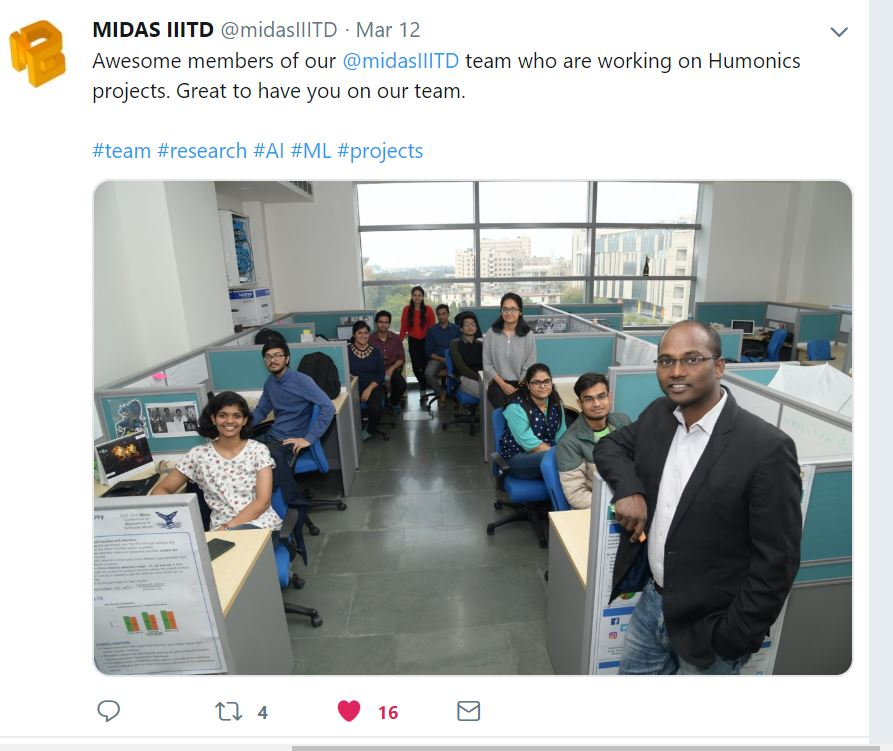

,Tweets,Date,Likes,Retweets,Pic used
9,Awesome members of our @midasIIITD team who ar...,2019-03-12 14:37:55,16,4,True


In [25]:
frame.to_dict('records')

frame.to_json(orient='records',lines=True)

from IPython.display import Image
display(Image(filename = "C:\\Users\\Jayant\\Desktop\\rr.JPG",width=400, height=400))
frame.loc[[9]]

In [234]:
print(frame.to_json(orient='records', lines=True))


{"Tweets":"We have emailed the task details to all shortlisted candidates for @midasIIITD internship. Kindly check the same.\u2026 https:\/\/t.co\/ku8O8HaoOe","Date":1552745216000,"Likes":6,"Retweets":0,"Pic used":false}
{"Tweets":"IEEE BigMM 2019 - Call for Workshop Proposals. \n\nContact @midasIIITD @RatnRajiv @debanjanbhucs if you have any quer\u2026 https:\/\/t.co\/EArExUYJE4","Date":1552728029000,"Likes":1,"Retweets":1,"Pic used":false}
{"Tweets":"Congratulations! Arijit, Ramit, @debanjanbhucs @RatnRajiv for your @NAACLHLT  @naacl SRW 2019 paper, \"Speak Up, Fig\u2026 https:\/\/t.co\/pc6pbJ9Iub","Date":1552727698000,"Likes":5,"Retweets":2,"Pic used":false}
{"Tweets":"We will be releasing a very interesting task to shortlisted candidates for the internship at @midasIIITD today. You\u2026 https:\/\/t.co\/PfjjoTNaWQ","Date":1552713194000,"Likes":6,"Retweets":2,"Pic used":false}
{"Tweets":"RT @hcdiiitd: Last day to register for #PortfolioCreationinDesign Workshop Indraprastha Institut

just made a likescount vs days graph :)

likes_count vs days graph


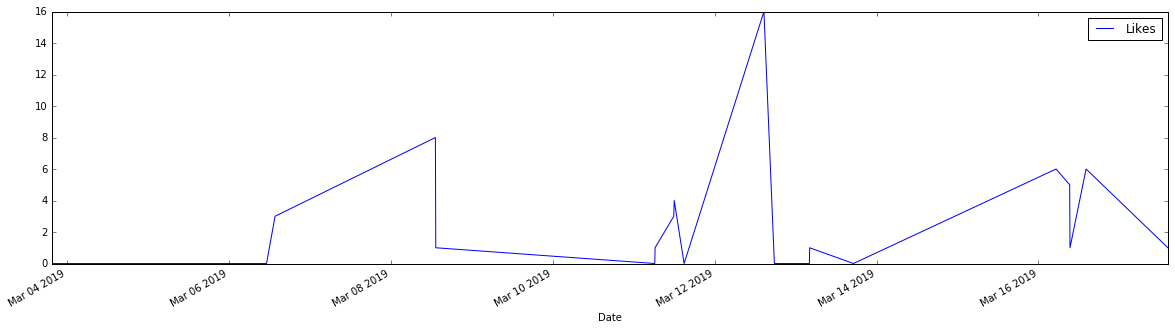

In [18]:
likd_tweets = pd.Series(data=frame['Likes'].values, index=frame['Date'])
likd_tweets.plot(figsize=(20,5), label="Likes",legend=True)
print("likes_count vs days graph")